# Recap of 1b

In the last set of activities you learned about basic Python data manipulation and a common astronomy data format: FITS files. You used this to calculate the mean stack of a set of astronomy images.

Now we're going to look at a different statistical measure — the median, which in many cases is considered to be a better measure than the mean due to its robustness to outliers.

However, a naïve implementation of the median algorithm can be very inefficient when dealing with large datasets. Luckily, computer scientists have spent a lot of time thinking about this problem and have found some good solutions.

In the following activities, you will learn different strategies to calculate the median and we will introduce you to thinking about how much CPU time and memory different algorithms require.

# Why use the median?

The median can be a more robust measure of the average trend of datasets than the mean, as the latter is easily skewed by outliers.

Say you have some measured fluxes and you calculate their mean:

In [1]:
from statistics import mean
fluxes = [17.3, 70.1, 22.3, 16.2, 20.7]
m = mean(fluxes)
print(m)

29.32


Looking at the original data, most of the numbers are pretty close to 20, so the mean doesn't look very representative. In fact, if you try taking out the outlier, 70.1, out the mean is 19.125.

The median is defined simply as the middle of the sorted data set. Since only the order of the data points matters, not their value, outliers have much less of an effect.

In [2]:
from statistics import median
fluxes = [17.3, 70.1, 22.3, 16.2, 20.7]
m = median(fluxes)
print(m)

20.7


This is much closer to our intuitive feel for the centre of the set.

# Calculating the median

To calculate the median of a list without using the statistics module, you need to sort the data and take the central value:

In [3]:
fluxes = [17.3, 70.1, 22.3, 16.2, 20.7]
fluxes.sort()
mid = len(fluxes)//2
median = fluxes[mid]
print(median)

20.7


This only works if you have an odd number of elements. If there are an even number of elements there are two middle ones, so you have to find both and take their average:

In [4]:
fluxes = [17.3, 70.1, 22.3, 16.2, 20.7, 19.3]
fluxes.sort()
mid = len(fluxes)//2
median = (fluxes[mid - 1] + fluxes[mid])/2
print(median)

20.0


# **Question: Mean of a list**

Write a function called list_stats that takes a list of numbers and returns a tuple of the median and mean of the list (in this order).

The function should work on lists with even or odd numbers of elements and handle the case of a one-element list.

Your solution cannot use the builtin statistics module.

# Hint
We will not test your function with an empty list.

# ⌛Solution:

In [5]:
# Write your list_stats function here.
def list_stats(numbers):
  numbers_sorted = sorted(numbers)
  n = len(numbers_sorted)
  mid = n // 2
  if n % 2 == 0:
    median = (numbers_sorted[mid -1] + numbers_sorted[mid])/2
  else:
    median = numbers_sorted[mid]
  mean = sum(numbers_sorted)/n
  return (median, mean)

# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your function with the first example in the question.
  m = list_stats([1.3, 2.4, 20.6, 0.95, 3.1, 2.7])
  print(m)

  # Run your function with the second example in the question
  m = list_stats([1.5])
  print(m)

(2.55, 5.175000000000001)
(1.5, 1.5)


# Finding an existing implementation

For simple tasks like calculating a mean or a median, it might be tempting to implement the solution yourself, rather than looking for an existing implementation.

While it is great for your understanding to implement numerical algorithms by hand, your solution may be incorrect (for some edge cases) or inefficient in terms of speed or memory usage.

We can assume that the community of developers who wrote, for example a popular library like NumPy, have put a lot of effort into checking its correctness and optimising its performance.

Without discouraging you from trying things yourself, it is important to keep in mind that someone else may have already found a more efficient solution to your problem.

But how can we judge which implementation is better? One way is by timing your programs. Python offers multiple ways in which this can be accomplished. For example, the time module lets you time any arbitrary piece of code:

In [6]:
import time
start = time.perf_counter()
# potentially slow computation
end = time.perf_counter() - start

The perf_counter uses the most accurate counter available on your device to measure the elapsed time.

# Timing your code

Let's look at an example. We want to find the mean of a large array using handwritten code and NumPy's mean function.

Here is the handwritten code. Note: we only time the calculation:

In [7]:
import time, numpy as np
n = 10**7
data = np.random.randn(n)

start = time.perf_counter()
mean = sum(data)/len(data)
seconds = time.perf_counter() - start

print('That took {:.2f} seconds.'.format(seconds))

That took 0.99 seconds.


Run the code above and see how long it takes. Now let's compare this to NumPy's mean function:

In [8]:
import time, numpy as np
n = 10**7
data = np.random.randn(n)

start = time.perf_counter()
mean = np.mean(data)
seconds = time.perf_counter() - start

print('That took {:.2f} seconds.'.format(seconds))

That took 0.01 seconds.


For the same size arrays, NumPy mean outperforms Python's sum because NumPy is optimised for numerical computation, whereas Python's generic functions work on many data types (e.g. strings).

Python's sum is more flexible, but much slower.

**Question: Time it!**

Write a time_stat function to time our statistic implementations.

time_stat should take three arguments: the func function we're timing, the size of the random array to test, and the number of experiments to perform. It should return the average running time for the func function.

We have provided a skeleton time_stat function to show you how func should be called. You should add timing code to this function.

The time for creating new random arrays for each experiment should not be included in the running time.

The times will differ depending on the hardware and workload of the server. They could be quite different on your own device.

Time your own implementations from the previous problems. You will find that the NumPy implementations will be hard to beat!

# ⌛Solution:

In [9]:
import numpy as np
import statistics
import time

def time_stat(func, size, ntrials):
  total_time = 0.0
  for _ in range(ntrials):  # Loop to call func ntrials times
    data = np.random.rand(size)  # Generate a new random array for each trial
    start_time = time.time()  # Start timing
    res = func(data)  # Call the function with the generated data
    end_time = time.time()  # Stop timing
    total_time += (end_time - start_time)  # Accumulate the time of each trial

  average_time = total_time / ntrials  # Calculate the average time
  return average_time

if __name__ == '__main__':
  # Test the statistics.mean function with a size of 10**5 and 10 trials.
  print('{:.6f}s for statistics.mean'.format(time_stat(statistics.mean, 10**5, 10)))
  # Test the np.mean function with a size of 10**5 and 1000 trials.
  print('{:.6f}s for np.mean'.format(time_stat(np.mean, 10**5, 1000)))

0.130584s for statistics.mean
0.000057s for np.mean


# Time isn't the only issue

When comparing algorithms, we may need to consider their memory usage as well as their speed. To create memory-efficient algorithms we first have to understand how Python uses memory.

Let's look at how much memory 32-bit Python needs to store some objects. The sys module allows us to check memory usage:

In [10]:
import sys

a = 3
b = 3.123
c = [a, b]
d = []
for obj in [a, b, c, d]:
  print(obj, sys.getsizeof(obj))

3 28
3.123 24
[3, 3.123] 72
[] 56


When you run the code above, you will see that an integer uses 14 bytes, a float uses 16 bytes, and a list of the two uses 40 bytes.

The memory used by c is not the sum of the sizes of a and b.

Firstly, there is overhead for the list itself (the empty list d is 32 bytes). Secondly, the list does not contain the objects themselves, but instead holds references to the other objects in memory.

Try inserting elements into an empty list and see how the memory usage grows as you add elements.

# **Note**
The values getsizeof returns depend on the Python implementation, the operating system, and the system architecture (e.g. 32-bit vs 64-bit). So don't be surprised if you get different results outside of Grok.

# The memory footprint of NumPy arrays

Since NumPy arrays are more compact, let's look at their memory usage. For NumPy arrays, getsizeof returns the total size.

Since NumPy overheads are small, we can use the array's nbytes attribute to get the memory usage of the data itself:

In [11]:
import sys
import numpy as np

a = np.array([])
b = np.array([1, 2, 3])
c = np.zeros(10**6)

for obj in [a, b, c]:
  print('sys:', sys.getsizeof(obj), 'np:', obj.nbytes)

sys: 112 np: 0
sys: 136 np: 24
sys: 8000112 np: 8000000


getsizeof will always return a larger value because NumPy arrays contain metadata about the data type, the shape of the array, and other properties, as well as the data itself.

We can calculate the nbytes value by multiplying the number of elements with the size in bytes of each element. The latter will be constant over the array.

In [12]:
import numpy as np

a = np.zeros(5, dtype=np.int32)
b = np.zeros(5, dtype=np.float64)

for obj in [a, b]:
  print('nbytes         :', obj.nbytes)
  print('size x itemsize:', obj.size*obj.itemsize)

nbytes         : 20
size x itemsize: 20
nbytes         : 40
size x itemsize: 40


Here we have set the dtype attribute to create two same-shape arrays with different data types. The size of each element in bytes is given by itemsize.

# Scaling up to large arrays

We now have an easy way to calculate the size of NumPy arrays in memory, so let's have a look at how things scale if we're working with many large arrays.

In the previous activity, we used FITS images with 200 ⨉ 200 pixels stored in (200, 200) arrays. Each element is a NumPy float32 (the 32 is 32 bits), which requires 4 bytes of memory.

In this example, the array would take up 156.25 kB (divide by 1024) of memory. This may not seem a lot, but now let's think about cases in which we have tens or thousands of arrays, if we wanted to calculate the median across them.

Use the example above to see how much memory is used for 1000 and 10,000 arrays and compare this to the memory of your machine. Typical astronomy images are also larger than 200 ⨉ 200.

# **Question: How much does the median cost?**

Write a median_fits function which takes a list of FITS filenames, loads them into a NumPy array, and calculates the median image (where each pixel is the median of that pixel over every FITS file).

Your function should return a tuple of the median NumPy array, the time it took the function to run, and the amount of memory (in kB) used to store all the FITS files in the NumPy array in memory.

The running time should include loading the FITS files and calculating the median.

# ⌛Solution:

In [ ]:
# Write your function median_FITS here:
import numpy as np
import time
from astropy.io import fits

def median_fits(filenames):
  start_time = time.time()
  fits_data = []
  for filename in filenames:
    with fits.open(filename) as hdul:
      fits_data.append(hdul[0].data)
  stack_data = np.dstack(fits_data)
  median_image = np.median(stack_data, axis = 2)
  memory_used = stack_data.nbytes / 1024
  end_time = time.time()
  return median_image, (end_time - start_time), memory_used

# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your function with first example in the question.
  result = median_fits(['image0.fits', 'image1.fits'])
  print(result[0][100, 100], result[1], result[2])

  # Run your function with second example in the question.
  result = median_fits(['image{}.fits'.format(str(i)) for i in range(11)])
  print(result[0][100, 100], result[1], result[2])

# **Note**
You can get quite different results for your timing, depending on how you implement the median calculation (we've used NumPy's median in the examples), but the central element of the array and the memory footprint you calculate should be the same as in the example.

# Saving space

Calculating the median requires all the data to be in memory at once. This is an issue in typical astrophysics calculations, which may use hundreds of thousands of FITS files.

Through the previous activities, you have hopefully noticed that even with a machine with lots of RAM, it's not going to be possible to find the median of more than a few tens of thousands of images.

This isn’t an issue for calculating the mean, since the sum only requires one image to be added at a time. You can load an image, add it to the sum, and then reuse the memory. Since the sum is only ever the size of a single image, you’ll never run out of memory.

# Histogram methods

If there were a way to calculate a "running median" you could save space by only having one image loaded at a time. Unfortunately, there’s no way to do an exact running median, but there are ways to do it approximately.

The binapprox algorithm does just this. The idea behind it is to find the median from the data's histogram. As an example, say we have a list of 30 numbers between 7 and 16 and its histogram is:
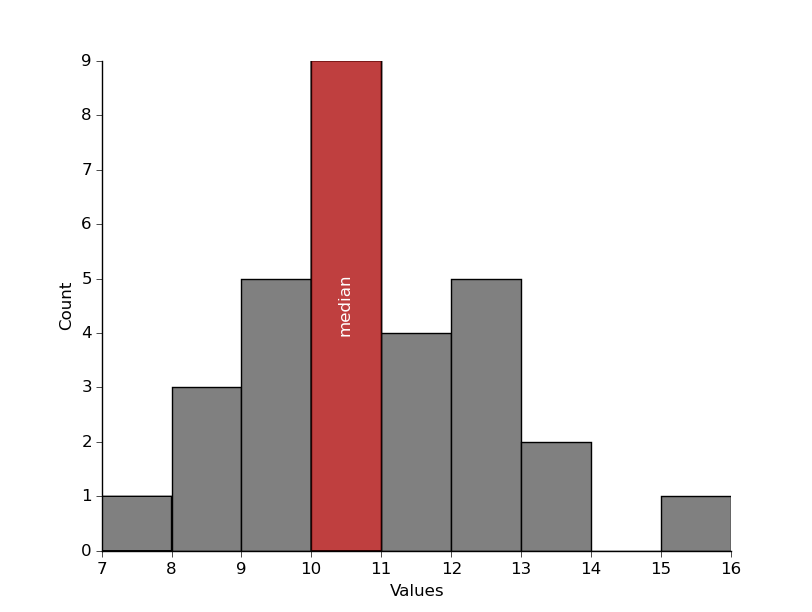

The median is the average of the 15th and 16th numbers in the ordered list (we can think of this as the 15.5th number). So, starting from the left, if we sum up the counts in the histogram bins until we get to just over 15.5 then we know the last bin we added must have contained the median.

In our example, the first 3 bins sum to 9 and the first 4 bins sum to 18, so we know that the median falls into the 4th bin (marked in red), and so it must be between 10 and 11.

We choose the middle (or midpoint) giving an estimate of 10.5.

# The binapprox algorithm

The [binapprox](https://www.stat.cmu.edu/~ryantibs/papers/median.pdf) algorithm uses the method from the previous slide, but it saves even more time and space by only looking for the median within one standard deviation of the mean (see the link if you’d like to know why that works).

The full algorithm for a set of $N$ data points works as follows:

The full algorithm for a set of $\displaystyle N$ data points works as follows:

1. Calculate their mean and standard deviation, $\displaystyle \mu$ and $\displaystyle \sigma$;
2. Set the bounds: $\displaystyle \text{minval} = \mu - \sigma \quad \text{and} \quad \text{maxval} = \mu + \sigma$.
   Any $\displaystyle \text{value} > \text{maxval}$ is ignored;
3. Set the bin width: $\displaystyle \text{width} = \frac{2\sigma}{B}$;
4. Make an ignore bin for counting values $\displaystyle < \text{minval}$;
5. Make $\displaystyle B$ bins for counting values in $\displaystyle [\text{minval}, \text{maxval}]$, e.g., the first bin is $\displaystyle \text{minval} \leq \text{value} < \text{minval} + \text{width}$;
6. Count the number of values that fall into each bin;
7. Sum these counts until $\displaystyle \text{total} \geq \frac{N + 1}{2}$.
   Remember to start from the ignore bin;
8. Return the midpoint of the bin that exceeded $\displaystyle \frac{N + 1}{2}$.

The midpoint of a bin is just the average of its min and max boundaries, i.e., the lower boundary $\displaystyle + \frac{\text{width}}{2}$.

As soon as the relevant bin is updated the data point being binned can be removed from memory. So if you're finding the median of a bunch of FITS files you only need to have one loaded at any time. (The mean and standard deviation can both be calculated from running sums so that still applies to the first step).

The downside of using binapprox is that you only get an answer accurate to $\displaystyle \frac{\sigma}{B}$ by using $\displaystyle B$ bins. Scientific data comes with its own uncertainties though, so as long as you keep $\displaystyle B$ large enough this isn't necessarily a problem.

# Challenge: Binapprox

Let's implement the binapprox algorithm to calculate the median of a list of numbers. This algorithm is quite complex, so we'll break it down into managable parts.

Your task is to write two functions:

1.   median_bins to calculate the mean, standard deviation and the bins (steps 1-6 on the previous slide);
2.   median_approx which calls median_bins and then calculates the approximated median (steps 7-8).

**median_bins(values, B)**

This function takes a list of values and the number of bins, B, and returns the mean $\mu$ and standard deviation $\sigma$ of the values, the number of values smaller than $\mu-\sigma$, and a NumPy array with $B$ elements containing the bin counts.

**median_approx(values, B)**

This function takes the same input as median_bins. It should return the approximate median using median_bins to calculate the bins.

# ⌛Solution:

In [13]:
import numpy as np

def median_bins(values, B):
  mean = np.mean(values)
  std = np.std(values)

  # Initialise bins
  left_bin = 0
  bins = np.zeros(B)
  bin_width = 2*std/B

  # Bin values
  for value in values:
    if value < mean - std:
      left_bin += 1
    elif value < mean + std:
      bin = int((value - (mean - std))/bin_width)
      bins[bin] += 1
    # Ignore values above mean + std

  return mean, std, left_bin, bins


def median_approx(values, B):
  # Call median_bins to calculate the mean, std,
  # and bins for the input values
  mean, std, left_bin, bins = median_bins(values, B)

  # Position of the middle element
  N = len(values)
  mid = (N + 1)/2

  count = left_bin
  for b, bincount in enumerate(bins):
    count += bincount
    if count >= mid:
      # Stop when the cumulative count exceeds the midpoint
      break

  width = 2*std/B
  median = mean - std + width*(b + 0.5)
  return median

Test:

In [15]:
median_bins([1, 1, 3, 2, 2, 6], 3)

(2.5, 1.707825127659933, 0, array([2., 3., 0.]))

In [16]:
median_approx([1,1,3,2,2,6], 3)

2.5

In [17]:
median_bins([1, 5, 7, 7, 3, 6, 1, 1], 4)
median_approx([1, 5, 7, 7, 3, 6, 1, 1], 4)

4.50544503130725

In [18]:
median_bins([0, 1], 5)
median_approx([0, 1], 5)

0.9

#  Challenge: Binapprox on FITS

Use the binapprox algorithm to efficiently estimate the median of each pixel from a set of astronomy images in FITS files.

Write median_bins_fits and median_approx_fits functions that take a list of FITS filenames and the number of bins. They should behave like the previous problem's functions, but operate over 2D astronomy images from the FITS files.

Expand your code from the previous problem to handle 2D arrays.

To calculate the mean and standard deviation of the FITS files, we've given you a running_stats helper function which calculates them in a single pass without holding the images in memory. It returns a tuple of the mean and standard deviation.

While your functions from the last problem returned single numbers for the mean, standard deviation, median and bins, they should now return arrays, since we want to calculate these quantities across the stack of FITS files.

The arrays should be of the same shape as the original FITS files, i.e. (200, 200) and have one extra dimension for the bins.

**Hint: You can also compare your results against the solution of the first median FITS problem.**

In [ ]:
# Import the running_stats function
from helper import running_stats
import numpy as np
from astropy.io import fits
# Write your median_bins_fits and median_approx_fits here:
# Function to calculate the bins
def median_bins_fits(filenames, B):
    mean, std = running_stats(filenames)
    dim = mean.shape
    minval = mean - std
    maxval = mean + std
    bin_width = 2 * std / B
    left_bin = np.zeros(dim)
    bins = np.zeros((dim[0], dim[1], B))
    for filename in filenames:
        with fits.open(filename) as hdulist:
            data = hdulist[0].data
            for i in range(dim[0]):
                for j in range(dim[1]):
                    value = data[i, j]
                    if value < minval[i, j]:
                        left_bin[i, j] += 1
                    elif value >= minval[i, j] and value < maxval[i, j]:
                        bin = int((value - minval[i, j]) / bin_width[i, j])
                        bins[i, j, bin] += 1
    return mean, std, left_bin, bins

# Function to approximate the median
def median_approx_fits(filenames, B):
    mean, std, left_bin, bins = median_bins_fits(filenames, B)
    bin_width = 2 * std / B
    N = len(filenames)
    median = np.zeros(mean.shape)

    for i in range(mean.shape[0]):
        for j in range(mean.shape[1]):
            count = left_bin[i, j]
            bin_idx = 0  # Index to iterate over the bins

            # Iterate over bins to find the median bin
            while count < (N + 1) / 2 and bin_idx < B:
                count += bins[i, j, bin_idx]
                bin_idx += 1

            # Calculate the median using the bin index that made the count reach (N+1)/2
            # Ensure bin_idx is within the valid range of indices
            bin_idx = max(0, min(bin_idx - 1, B - 1))
            # Recalculate minval since it's not defined in this scope
            minval = mean[i, j] - std[i, j]
            median[i, j] = minval + bin_width[i, j] * (bin_idx + 0.5)

    return median

# Test the functions
if __name__ == '__main__':
    mean, std, left_bin, bins = median_bins_fits(['image0.fits', 'image1.fits', 'image2.fits'], 5)
    median = median_approx_fits(['image0.fits', 'image1.fits', 'image2.fits'], 5)
    print(median[100, 100])